### IBM Applied Data Science Capstone on Coursera

# Project: Good Food for All 
<h2>An analysis of Chicago's neighborhoods for a NGO pilot program</h2>

## Table of Contents  
* [Introduction - Business Goals and Proposal](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

In this Project, we are helping a NGO identify optimal areas in Chicago to launch its Farmers Markets program that aims to help the Food Desert crisis.  This report is targeted at the NGO's stakeholders, who will be using our findings to help with the planning, scope, and allocation of the Farmers Markets program.   <br><br>


### Business Problem  
<br>
Our Client, a Social Advocacy NGO, wants to build out an effecient and effective program to address the "Food Desert" phenomenon in United States cities and is looking at Chicago to launch the pilot.  The objective is to provide the opportunity for all to have access to fresh, quality foods and produce, regardless of socioeconomic status, in an efficient, effective, and sustainlable way.
<h4> Background</h4>

Food Deserts are areas where access to fresh produce and groceries are difficult as there are no grocery shops or places to purchase such goods nearby. Foods that available are typically unhealthy - think of the foods one can get at a corner store, like chips, sodas, candy, etc - which further hurts the locals' health, well-being, and quality of life. <br><br>Unfortunately, Food Deserts are common in disfranchised communities, where help is needed the most.  
<br>
<h4>Proposal</h4><Br>
To help ameliorate the problem of Food Deserts, our NGO Client is proposing setting up Farmers Markets in communities with difficult access to quality groceries and fresh produce.  The Client sees Farmers Markets as not only an effective, but also the most efficient, solution. 
<br><br> Benefits of the proposed Farmers Markets structure  
    
* no need for permanent location
* eliminates large over-head costs of running a traditional market and reduces a lot of risks associated
* supports local businesses - partnership with family-owned, small, local farmers, food businesses, bakers, etc. to be vendors
* sustainable; minimize unnecessary food waste by getting surplus foods from corporate supermarkets and food companies to sell at very low price -- good food should not be wasted when there are people hungry.<br><br>
    
    
**Key Questions**  
<br>
The Client needs our help in understanding the city of Chicago, its socioeconomic make-up, and identifying places that are good candidates to introduce the program, but more importantly, if Chicago *is* a good city to start this project.  <br><br>Let's break-down some questions:


1. Amount of available markets (tradition brick-and-mortar supermarkets and weekly farmers markets)? Are there food deserts?
* How are the markets currently distributed? 
* Characteristics of neighborhoods (socioeconomic, population, etc) with and without markets?
* Which neighborhoods world best benefit from this program?
*  Is Chicago indeed a good place to launch the pilot program?<br> <br>
    
**Methods of Analysis - Data Science**  <br> <br>
In a very broad stroke, we will be looking at areas with no supermarkets nor farmers market in the vicinity as the best candidates for launching our Client's Farmers Markets program. <br> <br>In a more nuanced look, however, we'll need to gain a comprehensive and deep understanding of the city socioeconomic fabric to deliever the best recommendations. We'll sift through Chicago's public census data, understanding the wealth distribution and other socioeconomic factors, and - with data science - we'll employ models and graphs to further our analysis and put forth the best recommendations and suggestions that will help our NGO Client in successfully designing its program.


## Data <a name='data'></a>



To address the Client Business Project, let's identity the kind of data we'll need for a sound analysis.  
1. In looking at the **accessibility to fresh produce** and how they are distributed throughout the city, we'll need information on the current locations of places where one can purchase fresh groceries.  We'll look at **traditional supermarkets** (brick-and-mortar) as well as **farmers markets** ("nomadic markets").  <br><br>
2. **Socioeconomic data** on the different neighborhoods in Chicago are crucial to understanding this Project.  This includes data on population and wealth, which will help us identify **food deserts** and how communities compare with each other in terms of grocery accessibility.  Ultimately, this also helps us determine which spots are **good candidates** for this Project and if Chicago is a good place to start.<br><br>
3. **Location data (geoJSON, coordinates, zip codes)** are extremely helpful not only in pinpointing the exact places and areas of interests in Chicago, but also providing visual understanding of the data we gather.<br><br>
4. We'll also need information on **Community and Neighborhood** -- however Chicago is organized -- this works alongside location data in determining optimal areas and social make-up of the city.<br><br>



<h4>Data Sources, Collection</h4>  
<ul><b>Foursquare API </b> for locating Supermarkets/Grocery Shops</ul>
<ul><b>Chicago Census Data</b> (Government; Publically Available) - retreiving data on Farmers Markets, Geospatial, and Socioeconomic Indicators in city https://data.cityofchicago.org/</ul>
<ul><b>Web Scraping</b> - Zip Codes, Community Area Names/Neighborhoods, Location</ul>


<h4>Data Processing, Cleaning</h4><br>
We'll collect the raw data and process it way that leads to our analysis. This means we'll be cleaning the data (removing unnecessary information, null values, etc), formatting for consistency (units, scale, etc) and for appropriate tools (i.e. csv, Pandas dataframe, etc).<br><br>Let's begin and start setting up our environment and tools we need. 


In [155]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install lxml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install RISE

import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
from geopy.geocoders import Nominatim
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from folium import plugins
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
%matplotlib inline

print('libraries imported')

libraries imported


**Chicago Population by Zip Code**  
<br>
Population data is publically available on the Chicago government website.   We download the csv file and make that into a pandas dataframe.

In [700]:
#population city of chicago
df_popcsv = pd.read_csv('chicago_pop.csv')

#check columns ""
df_popcsv.columns
# df_popcsv.head()

Index(['Geography Type', 'Year', 'Geography', 'Population - Total',
       'Population - Age 0-17', 'Population - Age 18-29',
       'Population - Age 30-39', 'Population - Age 40-49',
       'Population - Age 50-59', 'Population - Age 60-69',
       'Population - Age 70-79', 'Population - Age 80+', 'Population - Female',
       'Population - Male', 'Population - Latinx',
       'Population - Asian Non-Latinx', 'Population - Black Non-Latinx',
       'Population - White Non-Latinx', 'Population - Other Race Non-Latinx',
       'Record ID'],
      dtype='object')

Since we only want the data in columns 'Geography' and 'Population -Total' and we'll go ahead and tidy up the dataframe by removing unnecessary information. 

In [701]:
df_popcsv = df_popcsv[['Geography', 'Population - Total']]
df_popcsv.columns = ['Zip Code', 'Population']
df_popcsv.drop(df_popcsv.index[0], inplace=True)

**Dataframe: Chicago Socioeconomic Indicators by Community Area Name**  
<br>
The socioeconomic indicators dataset is publically available on the Chicago government website.   We download the csv file and make that into a pandas dataframe.

In [702]:
#socioeconomic = city of chicago
df_cen = pd.read_csv('socioeco_chicago.csv')
# check dataframe
# df_cen.head()

#check columns
df_cen.columns.values

array(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'], dtype=object)

In [703]:
# reformat column names
df_cen = df_cen.rename(columns=lambda x: x.title().strip())
df_cen.head()

Community Area Number Community Area Name  Percent Of Housing Crowded  \
0                    1.0         Rogers Park                         7.7   
1                    2.0          West Ridge                         7.8   
2                    3.0              Uptown                         3.8   
3                    4.0      Lincoln Square                         3.4   
4                    5.0        North Center                         0.3   

   Percent Households Below Poverty  Percent Aged 16+ Unemployed  \
0                              23.6                          8.7   
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   Percent Aged 25+ Without High School Diploma  \
0                                          18.2   
1                                          20.8   
2                                          11.8   
3                                          13.4   
4                                           4.5   

   Percent Aged Under 18 Or Over 64  Per Capita Income  Hardship Index  
0                              27.5              23939            39.0  
1                              38.5              23040            46.0  
2                              22.2              35787            20.0  
3                              25.5              37524            17.0  
4                              26.2              57123             6.0

In [704]:
#Let's only retain the columns we need; drop the unwanted columns
df_cen = df_cen.drop(columns=['Community Area Number', 'Percent Of Housing Crowded','Percent Aged 16+ Unemployed','Percent Aged 25+ Without High School Diploma', 'Percent Aged Under 18 Or Over 64'])
df_cen.head()
# df_cen.info()

Community Area Name  Percent Households Below Poverty  Per Capita Income  \
0         Rogers Park                              23.6              23939   
1          West Ridge                              17.2              23040   
2              Uptown                              24.0              35787   
3      Lincoln Square                              10.9              37524   
4        North Center                               7.5              57123   

   Hardship Index  
0            39.0  
1            46.0  
2            20.0  
3            17.0  
4             6.0

In [705]:
#public health -  city of chicago
df_hcsv = pd.read_csv('health_chicago.csv')
# check dataframe
df_hcsv.head()

#merge public health and socioecon dataframes
# duplicate
df_cencsv_copy = df_cen.copy()
df_hcsv_copy = df_hcsv.copy()

df_sociohealth = df_cencsv_copy.merge(df_hcsv_copy, on='Community Area Name', how='inner')

# check dataframe
df_sociohealth.head()
# check column names
df_sociohealth.columns

Index(['Community Area Name', 'Percent Households Below Poverty',
       'Per Capita Income_x', 'Hardship Index', 'Community Area', 'Birth Rate',
       'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income_y', 'Unemployment'],
      dtype='object')

In [706]:
#keep only relevant columns
df_sociohealth = df_sociohealth[['Community Area Name', 'Per Capita Income_x', 'Percent Households Below Poverty','Hardship Index', 'Diabetes-related']]
df_sociohealth = df_sociohealth.rename(columns={'Per Capita Income_x':'Per Capita Income','Diabetes-related': 'Diabetes'})
df_sociohealth.head()

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
0         Rogers Park              23939                              23.6   
1          West Ridge              23040                              17.2   
2              Uptown              35787                              24.0   
3      Lincoln Square              37524                              10.9   
4        North Center              57123                               7.5   

   Hardship Index  Diabetes  
0            39.0      77.1  
1            46.0      60.5  
2            20.0      80.0  
3            17.0      55.4  
4             6.0      49.8

### **Data on Zip Codes and Community Area Name**
Since need to know what Community Area Name corresponds to which Zip Code, we need to obtain information on that relationship.<br><br> While we couldn't find a csv with that data, we found a website that did, so let's go ahead and **web-scrape** that data with BeautifulSoup.

In [707]:
url = requests.get('https://www.chicagotribune.com/chi-community-areas-htmlstory.html').text
soup = BeautifulSoup(url, 'lxml')

# table = soup.find('table')
## inspecting source, organized through nested tables (table within table)

# to better organize, we store each table into its own variable
t0, t1, t2 = soup.find('table').find_all('table')
# print(t1)

In [708]:
col_names2=['Zip Code', 'Community Area Name']
df2 =pd.DataFrame(columns = col_names2)

#function to make dataframe from scraped data
def filldf(s_table, datafrm):
    for tr in s_table.find_all('tr'):
        rows = []
        for td in tr.find_all('td'):
            rows.append(td.text.strip())
        if len(rows)==2:
            datafrm.loc[len(datafrm)]=rows

In [709]:
# dataframe - zip code as index
## web scrape for zip code and corresponding community area name
filldf(t2, df2)
# check dataframe
df2.head()

Zip Code    Community Area Name
0    60601                   Loop
1    60602                   Loop
2    60603                   Loop
3    60604                   Loop
4    60605  Loop, Near South Side

Separate Community Area Names to its own row

In [710]:
df2_fmt = df2.apply(lambda x:x.str.split(',').explode()).dropna()

# remove any white space 
df2_fmt['Zip Code']=df2_fmt['Zip Code'].str.strip()
df2_fmt['Community Area Name']=df2_fmt['Community Area Name'].str.strip()
df2_fmt.head(10)

Zip Code Community Area Name
0    60601                Loop
1    60602                Loop
2    60603                Loop
3    60604                Loop
4    60605                Loop
4    60605     Near South Side
5    60606                Loop
5    60606      Near West Side
6    60607                Loop
6    60607      Near West Side

In [711]:
dfx = df2_fmt.merge(df_sociohealth, on='Community Area Name')
dfx = dfx.merge(df_popcsv, on='Zip Code')
# dfx = df2_fmt.merge(df_cen, on='Community Area Name')
# dfx = dfx.merge(df_popcsv, on='Zip Code')
dfx.head()
# dfx.columns.values

Zip Code Community Area Name  Per Capita Income  \
0    60601                Loop              65526   
1    60602                Loop              65526   
2    60603                Loop              65526   
3    60604                Loop              65526   
4    60605                Loop              65526   

   Percent Households Below Poverty  Hardship Index  Diabetes  Population  
0                              14.7             3.0      26.8       14675  
1                              14.7             3.0      26.8        1244  
2                              14.7             3.0      26.8        1174  
3                              14.7             3.0      26.8         782  
4                              14.7             3.0      26.8       27519

#### Unique Zip Codes - Remove Duplicate Zip

In [712]:
# unique zip codes 
#drop duplicates
dfx.drop_duplicates(subset='Zip Code', keep='first', inplace=True)
dfx = dfx.reset_index(drop=True)
du = dfx.duplicated(subset='Zip Code').any()
print('Any Duplicated Zip Codes? {}\n'.format(du))
dfx[['Zip Code', 'Community Area Name', 'Population']].head()

Any Duplicated Zip Codes? False



Zip Code Community Area Name  Population
0    60601                Loop       14675
1    60602                Loop        1244
2    60603                Loop        1174
3    60604                Loop         782
4    60605                Loop       27519

### Comparing Chicago Neighborhoods - Socioeconomic

Now that we have each Zip Codes' Population count, we can organize it by Community Areas.  Since a **Community Area can be made up of several Zip Codes**, that we need to aggregate the population count of each zip code that is within its corresponding community area.  

In [713]:
# ##agg by comm area name
dfx_communities = dfx.groupby(by='Community Area Name').agg({'Population':'sum'}).reset_index()
print('Population by Each Community Area')
dfx_communities.head(10)

Population by Each Community Area


Community Area Name  Population
0         Albany Park       79243
1             Ashburn       43907
2              Austin      110930
3         Avalon Park      143792
4            Avondale       71023
5             Beverly       98875
6          Bridgeport       61495
7             Chatham       68096
8            Clearing       58797
9             Douglas       31972

We'll add in the rest of the census data.

In [714]:
df_allcc = dfx_communities.merge(dfx, on='Community Area Name', how='left')
df_allcc.drop(columns=['Zip Code', 'Population_y'], axis=1, inplace=True)
df_allcc.drop_duplicates(subset='Community Area Name', keep='first', inplace=True)
df_allcc = df_allcc.rename(columns={'Population_x':'Population'})
df_allcc.head()
# df_allcc.shape

Community Area Name  Population  Per Capita Income  \
0         Albany Park       79243              21323   
1             Ashburn       43907              23482   
2              Austin      110930              15957   
4         Avalon Park      143792              24454   
6            Avondale       71023              20039   

   Percent Households Below Poverty  Hardship Index  Diabetes  
0                              19.2            53.0      72.1  
1                              10.4            37.0      80.1  
2                              28.6            73.0     113.9  
4                              17.2            41.0      83.9  
6                              15.3            42.0      52.7

**Percentage of Total Chicago Population**  
To better compare the population of each Community Area, we will make a new column with the percent of Chicago's Total Population. 

In [715]:
# sum up Population column

tot=df_allcc['Population'].sum()
# print(tot)

# make new column that is percentage of total 
df_allcc['Percent of Chicago Total Population'] = df_allcc['Population'].apply(lambda x:(x/tot)*100)
df_allcc['Percent of Chicago Total Population']=df_allcc['Percent of Chicago Total Population'].apply(lambda x:round(x, 2))
#reformat columns 
df_allcc = df_allcc[['Community Area Name', 'Per Capita Income', 'Percent Households Below Poverty','Hardship Index', 'Diabetes','Population', 'Percent of Chicago Total Population']]
df_allcc.head()

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
0         Albany Park              21323                              19.2   
1             Ashburn              23482                              10.4   
2              Austin              15957                              28.6   
4         Avalon Park              24454                              17.2   
6            Avondale              20039                              15.3   

   Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
0            53.0      72.1       79243                                 2.95  
1            37.0      80.1       43907                                 1.64  
2            73.0     113.9      110930                                 4.13  
4            41.0      83.9      143792                                 5.36  
6            42.0      52.7       71023                                 2.65

### Farmers Markets

csv into pandas dataframe and see what is in the dataset

In [716]:
#farmers mkt csv into pandas dataframe
df_f= pd.read_csv('Export.csv')
df_f.head(2);

In [717]:
# see list of columns
df_f.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

Great -- now that we have the Farmers Market dataset, let's clean it up a bit.  

We will only keep the relevant columns and make sure the formatting and data types are consistent.

In [718]:
df_f = df_f[['MarketName', 'zip', 'x', 'y']]

In [719]:
# remove any null values
df_f = df_f.dropna()

#rename columns
df_f.columns = ['Market Name', 'Zip Code', 'Longitude', 'Latitude']
df_f.head()

Market Name  Zip Code  Longitude  \
0          0.0 Lincoln Park (Chicago) Farmers Market   60602.0 -87.670898   
1              0.8 West Town Health & Farmers Market   60622.0 -87.684395   
2  0.9 Wicker Park/Bucktown (Chicago) Farmers Market   60602.0 -87.677399   
3                          1.2 Conuco Farmers Market   60622.0 -87.692596   
4                     1.5 Erie Street Farmers Market   60610.0 -87.641403   

    Latitude  
0  41.897099  
1  41.902870  
2  41.908901  
3  41.903000  
4  41.893902

Notice the extra characters before each Market Name. Let's remove that from our dataframe.

In [720]:
# remove unnecessary str from Market Name
df_f['Market Name'] = df_f['Market Name'].str[3:]
# df_f.head()

**Dataframe -- Farmers Market Data (Zip and Coordinates)**

In [721]:
# make copy of dataframe for good measure
df_frmc = df_f.copy()

# convert to string and remove decimal
df_frmc['Zip Code'] = df_frmc['Zip Code'].apply(str).str[:-2]
# df_frmc = df_frmc.set_index('Zip Code')
df_frmc.head()

Market Name Zip Code  Longitude  \
0           Lincoln Park (Chicago) Farmers Market    60602 -87.670898   
1               West Town Health & Farmers Market    60622 -87.684395   
2   Wicker Park/Bucktown (Chicago) Farmers Market    60602 -87.677399   
3                           Conuco Farmers Market    60622 -87.692596   
4                      Erie Street Farmers Market    60610 -87.641403   

    Latitude  
0  41.897099  
1  41.902870  
2  41.908901  
3  41.903000  
4  41.893902

**Add Community Name and Pop data  to dataframe**

In [722]:
df_fmzip = df_frmc.merge(dfx, on='Zip Code', how='inner')
df_fmzip.head()

Market Name Zip Code  Longitude  \
0           Lincoln Park (Chicago) Farmers Market    60602 -87.670898   
1   Wicker Park/Bucktown (Chicago) Farmers Market    60602 -87.677399   
2              Daley Plaza Chicago Farmers Market    60602 -87.625999   
3          Garfield Park (Chicago) Farmers Market    60602 -87.716400   
4          Federal Plaza (Chicago) Farmers Market    60602 -87.629402   

    Latitude Community Area Name  Per Capita Income  \
0  41.897099                Loop              65526   
1  41.908901                Loop              65526   
2  41.885101                Loop              65526   
3  41.886299                Loop              65526   
4  41.879002                Loop              65526   

   Percent Households Below Poverty  Hardship Index  Diabetes  Population  
0                              14.7             3.0      26.8        1244  
1                              14.7             3.0      26.8        1244  
2                              14.7             3.0      26.8        1244  
3                              14.7             3.0      26.8        1244  
4                              14.7             3.0      26.8        1244

**Dataframe -- Farmers Market - Zip- Community Area Name - Coordinates**

In [723]:
# clean dataframe further; drop pop data (create new dataframe)

df_farmersmarketdata= pd.DataFrame(df_fmzip[['Market Name', 'Zip Code', 'Community Area Name', 'Longitude', 'Latitude']])

# there are duplicates of markets -- we need to only keep one --

df_farmersmarketdata.drop_duplicates(subset=['Market Name', 'Zip Code', 'Longitude', 'Latitude'], keep='first', inplace=True)
df_farmersmarketdata= df_farmersmarketdata.reset_index(drop=True)

df_farmersmarketdata.head()
##check datatypes and if any null values
#df_farmersmarketdata.info()

Market Name Zip Code  \
0           Lincoln Park (Chicago) Farmers Market    60602   
1   Wicker Park/Bucktown (Chicago) Farmers Market    60602   
2              Daley Plaza Chicago Farmers Market    60602   
3          Garfield Park (Chicago) Farmers Market    60602   
4          Federal Plaza (Chicago) Farmers Market    60602   

  Community Area Name  Longitude   Latitude  
0                Loop -87.670898  41.897099  
1                Loop -87.677399  41.908901  
2                Loop -87.625999  41.885101  
3                Loop -87.716400  41.886299  
4                Loop -87.629402  41.879002

In [724]:
# dataframe dimensions 
df_farmersmarketdata.shape

(43, 5)

**Visualizing Farmers Market Spread Across Chicago**

In [840]:
with open('chicago.geojson') as g_data:
        chicago_data = json.load(g_data)

## Look at geojson data
chicago_data;

In [808]:
# hone in on properties, where zip will be the key to match to dataframe
# chicago_data['features'][0]['properties']
# chicago_data['features'][0];

In [809]:
#chicago map (base map)

address='Chicago, IL'
geolocator=Nominatim(user_agent='chi_exp')
location=geolocator.geocode(address)
lati=location.latitude
longi=location.longitude

# create base map using latitude and longitude values
chicago_map=folium.Map(location=[lati, longi], zoom_start=10)
## display map
# chicago_map

print(chicago_data['features'][0]['properties'])

{'objectid': '33', 'shape_area': '106052287.488', 'shape_len': '42720.0444058', 'zip': '60647'}


In [810]:
# update chicago geojson with population information 

zp = dfx[['Zip Code', 'Population']]
zp = zp.drop(index=55)
zipdict = zp.to_dict('records')
zipdict;

fe = chicago_data['features']

for ent in fe:
    for z in zipdict:
        zi = z['Zip Code']
        po = str(z['Population'])
        if ent['properties']['zip'] == zi:
            ent['properties'].update({'population': po})
    
chicago_data['features'][5]['properties']

{'objectid': '38',
 'shape_area': '23506055.7304',
 'shape_len': '34689.3506306',
 'zip': '60611',
 'population': '32426'}

#### Visualizing Chicago Population - Choropleth Map 

We have enough info currently to see how the population is spread out in Chicago.  Let's plot it out with folium. 

In [811]:
folium.Choropleth(
    geo_data=chicago_data,
    name='choropleth',
    data=dfx, 
    columns=['Zip Code', 'Population'], 
    key_on='properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population (Count)'
).add_to(chicago_map)

folium.LayerControl().add_to(chicago_map)
##show map 
chicago_map


Let's also go ahead and plot out the Farmers Markets.

In [812]:
# loop thru dataframe to get location values and plot each on map (add to base map)
for lat, lng, label in zip(df_farmersmarketdata['Latitude'], df_farmersmarketdata['Longitude'], df_farmersmarketdata['Market Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.5,
        parse_html=False).add_to(chicago_map)

folium.LayerControl().add_to(chicago_map)
#show map
chicago_map


**Dataframe -- Farmers Market by Community Area Name**  

  
Let's find out what is the total count of Farmers Market by Community Area Name.  

We'll create a new dataframe containing this information. 

In [813]:
##consolidate comm area name
df_countfm = df_farmersmarketdata.groupby(by=['Community Area Name']).count()
df_countfm = df_countfm.reset_index()

# ## number of unique Community Areas
df_countfm = pd.DataFrame(df_countfm[['Community Area Name', 'Market Name']])
df_countfm = df_countfm.rename(columns={'Market Name': 'Number of Farmers Markets'})

df_countfm.head()

Community Area Name  Number of Farmers Markets
0         Albany Park                          1
1              Austin                          1
2            Avondale                          1
3          Bridgeport                          2
4           Edgewater                          3

In [841]:
# The code was removed by Watson Studio for sharing.

### Foursquare API   
**Get Grocery Shops / Supermarkets around Chicago with Foursquare API**

In [815]:
#parameters API call
lt = 41.85654276860064
lg = -87.63850003480911
radius = 5000
LIMIT = 100

cat_id='4bf58dd8d48988d118951735' #foursquare category id for grocery shops
cat_id2='52f2ab2ebcbc57f1066b8b46'#foursquare category id for supermarkets

url ='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={},{}'.format(CLIENT_ID2, CLIENT_SECRET2, lt, lg, VERSION, radius, LIMIT,  cat_id, cat_id2)

In [842]:
# resulting data from api call
results = requests.get(url).json()

In [817]:
venues = results['response']['venues']
# venues
# ## json to pd dataframe
df_fsq = pd.json_normalize(venues)

##check dataframe
# df_fsq.head()

Let's clean up the dataframe and drop unwanted columns.  We want to keep the **Name** (of Shop),**Categories** (make sure is either 'Supermarket' or 'Grocery Shop' for correct data), **Coordinate Info** ( Lat, Long), **Postal Code**.

We'll also create a function to extract the category names from the results of the Foursquare call.

In [818]:
#create function to extract category names (ensure right data)
def get_details(row_fs):
    try:
        categories_list=row_fs['categories']
    except:
        categories_list=row_fs['venue.categories']
    
    if len(categories_list) ==0:
        return None
    else:
        return categories_list[0]['name']

In [819]:
# keep only columns we need
supermarkets = pd.DataFrame(df_fsq[['name', 'categories', 'location.lat', 'location.lng', 'location.postalCode']])

# fill in categories columns with category data (what kind of category - Should be supermarket or grocery store)
supermarkets['categories'] = supermarkets.apply(get_details, axis=1)
# supermarkets.head()
supermarkets.shape

(50, 5)

**Checking Categories (Column)  Values**  

Let's check the category values and see if we have any data that needs to be taken out.    
We are only interested in categories of 'Grocery Store' and 'Supermarket'

In [820]:
#check categories values -- we want only categories are 'Grocery Store' or 'Supermarket'
ck = (supermarkets['categories'] == 'Grocery Store') | (supermarkets['categories'] == 'Supermarket')
ck.all() == True 

False

Returning FALSE let's us know that there are irrevelant data points in the set.  

In [821]:
#create new dataframe -- keep only grocery store and supermarket categories 
df_supermarkets = pd.DataFrame(supermarkets.loc[ck])

df_supermarkets = df_supermarkets.reset_index(drop=True)
# df_supermarkets

In [822]:
#reformat column names
df_supermarkets = supermarkets.drop(columns = 'categories')
df_supermarkets.columns = ['Supermarket Name', 'Latitude', 'Longitude', 'Zip Code']
df_supermarkets = df_supermarkets.dropna()
df_supermarkets.head()
# df_supermarkets.info()

Supermarket Name   Latitude  Longitude Zip Code
0         Richwell Market  41.856619 -87.638804    60616
1      Whole Foods Market  41.891589 -87.620438    60611
2            Trader Joe's  41.893515 -87.626088    60611
3  Mariano's Fresh Market  41.880802 -87.647751    60661
4              Jewel-Osco  41.904022 -87.631670    60610

Ok, now that we have the dataframe more cleaned up, we can add in the corresponding Community Area Name (with Zip Code as key) -- this will give us more insight. 

In [823]:
# add in Community Area Name information to dataframe  (df2_fmt)
df_supermktcomb = df_supermarkets.merge(df2_fmt, on='Zip Code')

#check dataframe
# df_supermktcomb.info()
df_supermktcomb.head()

Supermarket Name   Latitude  Longitude Zip Code       Community Area Name
0  Richwell Market  41.856619 -87.638804    60616             Armour Square
1  Richwell Market  41.856619 -87.638804    60616                Bridgeport
2  Richwell Market  41.856619 -87.638804    60616                   Douglas
3  Richwell Market  41.856619 -87.638804    60616  Lower West Side (Pilsen)
4  Richwell Market  41.856619 -87.638804    60616           Near South Side

Merge successful, but notice that we have duplicate Supermarket entries (Zip Code matched with more than one Community Area).  To keep it simple, we will just keep one of the entries. 

In [824]:
df_supermktcomb.drop_duplicates(subset=['Supermarket Name', 'Latitude', 'Longitude', 'Zip Code'], keep='first', inplace=True)

df_supermktcomb = df_supermktcomb.reset_index(drop=True)
df_supermktcomb.head()
# df_supermktcomb.info()

Supermarket Name   Latitude  Longitude Zip Code Community Area Name
0   Richwell Market  41.856619 -87.638804    60616       Armour Square
1        Jewel-Osco  41.833040 -87.614837    60616       Armour Square
2        Fresh Mart  41.848835 -87.641953    60616       Armour Square
3         Mariano's  41.859330 -87.629622    60616       Armour Square
4  Chinatown Market  41.853691 -87.632393    60616       Armour Square

Now we can see how many supermarkets are in each Community Area.

In [825]:
## dataframe for farmers market count by comm area : df_countfm

##consolidate comm area name
df_countsupermk = df_supermktcomb.groupby(by=['Community Area Name']).count()
df_countsupermk.drop(['Latitude', 'Longitude', 'Zip Code'], axis=1, inplace=True)
df_countsupermk = df_countsupermk.rename(columns={'Supermarket Name':'Number of Supermarkets'}).reset_index()
df_countsupermk.head()

Community Area Name  Number of Supermarkets
0       Armour Square                       9
1             Beverly                       1
2          Bridgeport                      10
3             Douglas                       1
4       Humboldt Park                       2

In [826]:
#we can add in farmers market count #df_countfm 
df_allmarkets = df_countsupermk.merge(df_countfm, on='Community Area Name', how='outer')
#not all community areas will have a value for either super or farmers markets, as such, it will be NaN. We will replace that with a 0.

df_allmarkets.replace(np.nan, 0, inplace=True)
# df_allmarkets.info()

Changing the dtype of the 2 number columns to int (currently float).

In [827]:
df_allmarkets['Number of Supermarkets'] = df_allmarkets['Number of Supermarkets'].astype('int')
df_allmarkets['Number of Farmers Markets'] = df_allmarkets['Number of Farmers Markets'].astype('int')
df_allmarkets.head()

Community Area Name  Number of Supermarkets  Number of Farmers Markets
0       Armour Square                       9                          0
1             Beverly                       1                          0
2          Bridgeport                      10                          2
3             Douglas                       1                          0
4       Humboldt Park                       2                          0

In [828]:
#add total markets column
df_allmarkets['Total Markets'] = df_allmarkets.sum(axis=1)
df_allmarkets;

#### Visualizing Supermarkets and Farmers Markets in Chicago

In [829]:
## make map showing super market and farmers market spread in Chicago 
# loop thru dataframe to get location values and plot each on map (add to base map)
for lat, lng, label in zip(df_supermktcomb['Latitude'], df_supermktcomb['Longitude'], df_supermktcomb['Supermarket Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.5,
        parse_html=False).add_to(chicago_map)

folium.LayerControl().add_to(chicago_map)
#show map
chicago_map


**Dataframe -- Census and Total Super and Farmers Market by Community Area**  


For NaN, we'll go ahad and drop the row (since it doesn't affect the data) while cleaning up the data.

In [839]:
##merge
# census data: df_allcc
# markets: df_allmarkets

df_cm_data = df_allcc.merge(df_allmarkets, on='Community Area Name')

df_cm_data =df_cm_data.dropna()
df_cm_data.reset_index(drop=True)
df_cm_data;

To better compare, we will caculate the percentage of total markets each Community Area has.  

In [843]:
tot_m=df_cm_data['Total Markets'].sum()

# # make new column that is percentage of total 
df_cm_data['Percent of Total Markets'] = df_cm_data['Total Markets'].apply(lambda x:(x/tot_m)*100)
df_cm_data['Percent of Total Markets'] = df_cm_data['Percent of Total Markets'].apply(lambda x:round(x, 2))
df_cm_data;

In [757]:
#sum population of communities with markets
pop_ymkts = df_cm_data['Population'].sum()
pop_ymkts
per_pop_ymkts = (pop_ymkts/tot)*100
print('percentage of total population with access to markets')
per_pop_ymkts

percentage of total population with access to markets


70.15931678569645

#### Dataframe: Community Areas without Supermarkets and/or Farmers Markets

In [602]:
#community areas without supermarkets and/or farmers markets
df_allcm = df_cm_data.merge(df_allcc, on=['Community Area Name', 'Per Capita Income', 'Percent Households Below Poverty', 'Hardship Index', 'Diabetes','Percent of Chicago Total Population', 'Population'], how='right', indicator=True)
#replace nan with 0
# df_allcm.head()

Let's make a dataframe just focusing on Community Areas without Markets; Community Areas with ZERO markets are Food Deserts, exactly the spots we want to look at and focus on to gain more insight on fulfilling this projects needs and goals. <br><Br>
To get this information, let's merge the dataframe containing the Communities with Markets and the dataframe of ALL communities with their corresponding socioeconomic data -- the 'difference' of the merge will be the areas without markets (this will also give us the convenience of having the census data as well for analysis). 

In [770]:
df_nomarkets = pd.DataFrame(df_allcm[df_allcm['_merge']=='right_only'])
df_nomarkets = df_nomarkets.drop('_merge', axis=1)
df_nomarkets = df_allchicago.reset_index(drop=True)
# df_nomarkets.head()
# #We'll clean up the dataframe, since we don't need the last four columns (all of these Areas do not have Markets)
df_nomarkets.drop(columns=['Number of Supermarkets', 'Number of Farmers Markets', 'Total Markets', 'Percent of Total Markets'], axis=1, inplace=True)
print('Dataframe -- Community Areas with Zero Supermarkets and Farmers Markets')
df_nomarkets

Dataframe -- Community Areas with Zero Supermarkets and Farmers Markets


Community Area Name  Per Capita Income  Percent Households Below Poverty  \
0              Ashburn              23482                              10.4   
1          Avalon Park              24454                              17.2   
2              Chatham              18881                              27.8   
3             Clearing              25113                               8.9   
4          Edison Park              40959                               3.3   
5      Grand Boulevard              23472                              29.3   
6         Logan Square              31908                              16.8   
7      Near South Side              59077                              13.8   
8           North Park              26576                              13.2   
9               O'Hare              25828                              15.4   
10            Roseland              17949                              19.8   
11       South Deering              14685                              29.2   
12         South Shore              19398                              31.1   
13          West Ridge              23040                              17.2   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
0             37.0      80.1       43907                                 1.64  
1             41.0      83.9      143792                                 5.36  
2             60.0      73.2       68096                                 2.54  
3             29.0      72.0       58797                                 2.19  
4              8.0      53.0       29529                                 1.10  
5             57.0      82.6       41563                                 1.55  
6             23.0      75.7       90517                                 3.37  
7              7.0      61.5       54464                                 2.03  
8             33.0      58.9       69055                                 2.57  
9             24.0      47.3       27579                                 1.03  
10            52.0      95.5       66724                                 2.49  
11            65.0      80.6       12871                                 0.48  
12            55.0      95.4       46024                                 1.72  
13            46.0      60.5       47732                                 1.78

## Methodology and Analysis <a name='methodology'></a>

With the data collected and procesed, we'll move forward by exploring and identifying patterns amongst the neighborhoods.  The exploratory data process helps us to identify what models we can use to draw further insight and better inform us on the characteristics of the Communities of interest for this project. 
<br><br>
We'll look at both the profiles of Communities with Food Markets and Communities without - Food Deserts, in other words.  
<br>
To be thorough and have stronger insight, we do want to see if there is a reason for the Food Deserts, or if there is a reason or concentration of Food Markets in the city - are there Community factors at play that influence the accessibility of food markets? <br><Br>
Likewise, we'll also focus on the Communities with Food Deserts to see if those areas have common characteristics.  <br><Br>
We'll use **K-means clustering** to figure out the different profiles of Communities with and without food deserts - what can we gain from the model and what it tells us about pushing forward with the Client project.  K-means is helpful in this case as it is a model commonly used to **determine segmentation** and typical or shared patterns.
        
<br> Additionally, we'll use various graphs, including **bar graphs, box, and scatter plots to for visual comparison** and understanding - adding another level of clarity. 
<br>
    
Understanding if there is indeed a discrepency between Communities with access to food markets versus Communities without (in particular, regarding to quality of life, health, income) will help us determine if Chicago is a good place to launch the Client program.  It is important to make an impact for the community! 




#### Bar graph comparing proportion of population and grocery markets

We wonder if there is a correlation between population and the amount of food markets available in a community.  A bar graph showing the two gives us a quick visual understanding. 

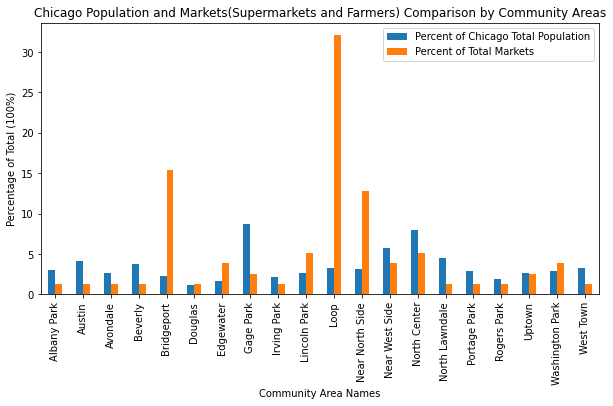

In [610]:
dft = df_cm_data.copy()
dft = dft[['Community Area Name', 'Percent of Chicago Total Population', 'Percent of Total Markets']]
dft.index = dft['Community Area Name']

dft.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Community Area Names')
plt.ylabel('Percentage of Total (100%)')
plt.title('Chicago Population and Markets(Supermarkets and Farmers) Comparison by Community Areas')

plt.show()

Looking at this bar graph, we can quickly infer that the population of a Community Area does not influence the amount of Grocery Markets within that same space.  
 
For example, we can see the Community Area of 'Loop' has the greatest amount of Grocery Markets in Chicago (at 32% of total markets in the city) even though it does not have the greatest population (at 3.3% of total city population). <br><br>
Conversely, the Community with the greatest population of the city total is Gage Park (at 8.8% of total population), which has only 2.6% of the total Grocery Marketscount.

For good measure, let's also see how it looks on a scatter plot. 

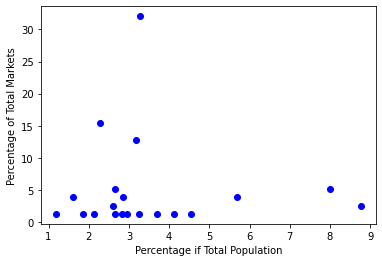

In [608]:
plt.scatter(df_allcmdata['Percent of Chicago Total Population'], df_allcmdata['Percent of Total Markets'], color='blue')
plt.xlabel('Percentage if Total Population')
plt.ylabel('Percentage of Total Markets')
plt.show()

Nope. No relationship. So now, we wonder if there is a relationship between income (per capita income) and number of food markets?  Let's plot it out on a scatter plot once more!


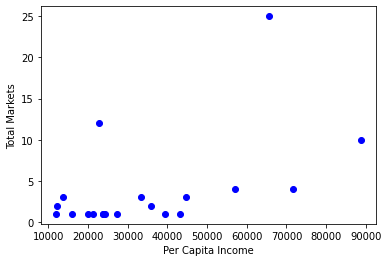

In [609]:
plt.scatter(df_allcmdata['Per Capita Income'], df_allcmdata['Total Markets'], color='blue')
plt.xlabel('Per Capita Income')
plt.ylabel('Total Markets')
plt.show()

Again, doesn't seem to be a relationship between the amount of markets and the income of a community.  We wee that a community with a higher per capita income (a little above USD 70k) has roughly the same amount of markets as a community with around USD 15k.  There are a few outliers (per capita ~USD 65k with a little above 25 food markets), but - as in definition of an outlier - doesn't tell us much.  Just nice to know. 


That was fun.  Let's do some descriptive statistical analysis between communities with food markets and communities with food deserts.  We'll be able to see if there are glaring discrepencies between these two halves. 

In [830]:
# Descriptive Statistical Analysis , Communities with Markets
stats_withmarkets = df_cm_data.describe()
stats_withmarkets

Per Capita Income  Percent Households Below Poverty  Hardship Index  \
count          20.000000                         20.000000       20.000000   
mean        34838.450000                         19.925000       36.100000   
std         21358.193674                         10.048298       29.947146   
min         12034.000000                          5.100000        1.000000   
25%         21002.000000                         13.050000       11.500000   
50%         25792.500000                         18.550000       34.500000   
75%         43570.750000                         23.700000       48.500000   
max         88669.000000                         43.100000       93.000000   

         Diabetes     Population  Percent of Chicago Total Population  \
count   20.000000      20.000000                            20.000000   
mean    67.845000   94121.600000                             3.508000   
std     26.549487   52510.540473                             1.957613   
min     26.800000   31972.000000                             1.190000   
25%     49.800000   67660.000000                             2.522500   
50%     61.250000   77869.500000                             2.900000   
75%     82.050000  101888.750000                             3.800000   
max    119.100000  235092.000000                             8.760000   

       Number of Supermarkets  Number of Farmers Markets  Total Markets  \
count               20.000000                  20.000000      20.000000   
mean                 1.750000                   2.150000       3.900000   
std                  3.654485                   2.739093       5.811966   
min                  0.000000                   0.000000       1.000000   
25%                  0.000000                   1.000000       1.000000   
50%                  0.000000                   1.500000       1.500000   
75%                  1.000000                   2.000000       3.250000   
max                 12.000000                  13.000000      25.000000   

       Percent of Total Markets  
count                 20.000000  
mean                   4.999000  
std                    7.451216  
min                    1.280000  
25%                    1.280000  
50%                    1.920000  
75%                    4.170000  
max                   32.050000

In [831]:
# Descriptive Statistical Analysis , Communities with Markets
stats_w_nomarkets = df_nomarkets.describe()
# stats_w_nomarkets['Hardship Index']['mean']
stats_w_nomarkets

Per Capita Income  Percent Households Below Poverty  Hardship Index  \
count          14.000000                         14.000000       14.000000   
mean        26773.000000                         18.100000       38.357143   
std         11288.333024                          8.461224       18.644889   
min         14685.000000                          3.300000        7.000000   
25%         20308.500000                         13.350000       25.250000   
50%         23968.000000                         17.000000       39.000000   
75%         26389.000000                         25.800000       54.250000   
max         59077.000000                         31.100000       65.000000   

        Diabetes     Population  Percent of Chicago Total Population  
count  14.000000      14.000000                            14.000000  
mean   72.871429   57189.285714                             2.132143  
std    14.892044   31879.720596                             1.187623  
min    47.300000   12871.000000                             0.480000  
25%    60.750000   42149.000000                             1.572500  
50%    74.450000   51098.000000                             1.905000  
75%    82.100000   67753.000000                             2.527500  
max    95.500000  143792.000000                             5.360000

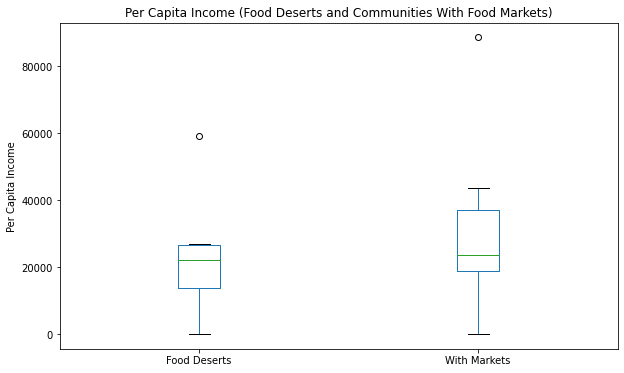

In [832]:
pc = pd.DataFrame(stats_w_nomarkets['Per Capita Income'])
pc.columns = ['Food Deserts']
pc['With Markets'] = pd.DataFrame(stats_withmarkets['Per Capita Income'])
pc.plot(kind='box', figsize=(10, 6))
plt.title('Per Capita Income (Food Deserts and Communities With Food Markets)')
plt.ylabel('Per Capita Income')
plt.show()

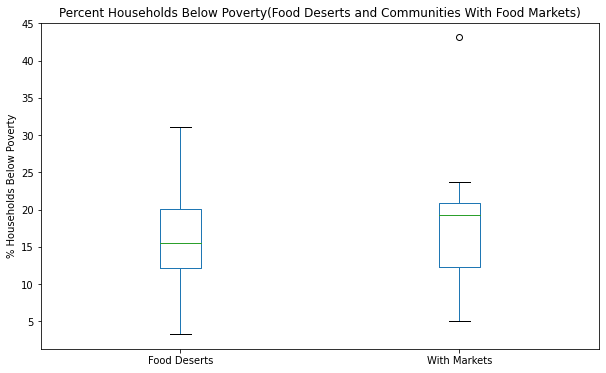

In [833]:
bp = pd.DataFrame(stats_w_nomarkets['Percent Households Below Poverty'])
bp.columns = ['Food Deserts']
bp['With Markets'] = pd.DataFrame(stats_withmarkets['Percent Households Below Poverty'])
bp.plot(kind='box', figsize=(10, 6))
plt.title('Percent Households Below Poverty(Food Deserts and Communities With Food Markets)')
plt.ylabel('% Households Below Poverty')
plt.show()

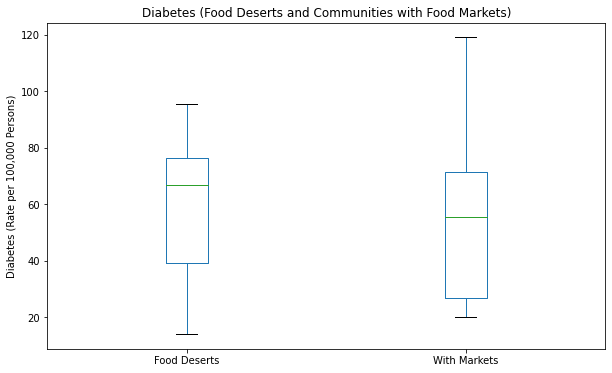

In [834]:
diab = pd.DataFrame(stats_w_nomarkets['Diabetes'])
diab.columns = ['Food Deserts']
diab['With Markets'] = pd.DataFrame(stats_withmarkets['Diabetes'])
diab.plot(kind='box', figsize=(10, 6))
plt.title('Diabetes (Food Deserts and Communities with Food Markets)')
plt.ylabel('Diabetes (Rate per 100,000 Persons)')
plt.show()
                        

In [835]:
# make data frame with ALL communities
df_allcmdata = df_allcm.copy()
df_allcmdata = df_allcmdata.drop(columns='_merge', axis=1)
df_allcmdata = df_allcmdata.reset_index(drop=True)
df_allcmdata.head();

In [836]:
#calculate percentage of ppl w/o access to supermarkets and farmers markets in Chicago
## total of POPULATION / TOTAL OF CITY 
nomk = df_nomarkets['Population'].sum()
pop_nomk = round((nomk/tot)*100, 2)
print('Percentage of Chicago Pop Without Access to Supermarkets nor Farmers Markets in Community Area')
print(pop_nomk)

Percentage of Chicago Pop Without Access to Supermarkets nor Farmers Markets in Community Area
29.84


### K-Means Clustering  
<br>
To dig further into our findings, we'll use K-means clustering to identify common characteristics and qualities amongst the Food Desert Communities and Communities with Food Market access.  <br><br>
Since we could not spot a relationship between income and amount of markets, between population and amount of markets, perhaps there are other underlaying factors that we've overlooked.  <br><br>
K-Means Clustering is helpful in drawing out the naunces of the data set. 

##### Communities with Markets   
<br>
Let's start by looking at the clustered characteristics of the Communities with Market.  Are there any enlightening information we can understand before looking into the Food Desert communities?


In [520]:
kclusters=5

grp = pd.DataFrame(df_cm_data[['Per Capita Income', 'Percent of Chicago Total Population','Total Markets', 'Percent of Total Markets']])
grp

k_means = KMeans(n_clusters=kclusters, random_state=0).fit(grp)
k_means_labels = k_means.labels_[0:33]
k_means_labels

array([1, 4, 1, 0, 1, 1, 0, 4, 1, 2, 2, 3, 0, 2, 4, 1, 1, 0, 4, 0],
      dtype=int32)

In [527]:
df_kc = df_cm_data.copy()
df_kc.insert(0, 'Cluster Labels', kmeans.labels_)

df_kc.head();

In [522]:
df_kc.loc[df_kc['Cluster Labels'] == 0, df_kc.columns[[1]+list(range(2, df_kc.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
1               Austin              15957                              28.6   
12      Near West Side              44689                              20.6   
14      North Lawndale              12034                              43.1   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  \
1             73.0     113.9      110930                                 4.13   
12            15.0      62.3      152535                                 5.69   
14            87.0      99.2      122137                                 4.55   

    Number of Supermarkets  Number of Farmers Markets  Total Markets  \
1                        0                          1              1   
12                       1                          2              3   
14                       0                          1              1   

    Percent of Total Markets  
1                       1.28  
12                      3.85  
14                      1.28

In [523]:
df_kc.loc[df_kc['Cluster Labels'] == 1, df_kc.columns[[1]+list(range(2, df_kc.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
4           Bridgeport              22694                              18.9   
5              Douglas              23791                              29.6   
6            Edgewater              33385                              18.2   
8          Irving Park              27249                              13.1   
16         Rogers Park              23939                              23.6   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  \
4             43.0      49.8       61495                                 2.29   
5             47.0     119.1       31972                                 1.19   
6             19.0      48.8       43242                                 1.61   
8             34.0      60.2       57344                                 2.14   
16            39.0      77.1       49730                                 1.85   

    Number of Supermarkets  Number of Farmers Markets  Total Markets  \
4                       10                          2             12   
5                        1                          0              1   
6                        0                          3              3   
8                        0                          1              1   
16                       0                          1              1   

    Percent of Total Markets  
4                      15.38  
5                       1.28  
6                       3.85  
8                       1.28  
16                      1.28

In [524]:
df_kc.loc[df_kc['Cluster Labels'] == 2, df_kc.columns[[1]+list(range(2, df_kc.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
0          Albany Park              21323                              19.2   
2             Avondale              20039                              15.3   
3              Beverly              39523                               5.1   
15        Portage Park              24336                              11.6   
17              Uptown              35787                              24.0   
18     Washington Park              13785                              42.1   
19           West Town              43198                              14.7   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  \
0             53.0      72.1       79243                                 2.95   
2             42.0      52.7       71023                                 2.65   
3             12.0      59.6       98875                                 3.69   
15            35.0      48.2       75995                                 2.83   
17            20.0      80.0       69715                                 2.60   
18            88.0      88.2       76496                                 2.85   
19            10.0     107.0       87509                                 3.26   

    Number of Supermarkets  Number of Farmers Markets  Total Markets  \
0                        0                          1              1   
2                        0                          1              1   
3                        1                          0              1   
15                       0                          1              1   
17                       0                          2              2   
18                       0                          3              3   
19                       0                          1              1   

    Percent of Total Markets  
0                       1.28  
2                       1.28  
3                       1.28  
15                      1.28  
17                      2.56  
18                      3.85  
19                      1.28

In [525]:
df_kc.loc[df_kc['Cluster Labels'] == 3, df_kc.columns[[1]+list(range(2, df_kc.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
9         Lincoln Park              71551                              12.3   
10                Loop              65526                              14.7   
11     Near North Side              88669                              12.9   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  \
9              2.0      50.1       71308                                 2.66   
10             3.0      26.8       88012                                 3.28   
11             1.0      27.0       85219                                 3.18   

    Number of Supermarkets  Number of Farmers Markets  Total Markets  \
9                        2                          2              4   
10                      12                         13             25   
11                       8                          2             10   

    Percent of Total Markets  
9                       5.13  
10                     32.05  
11                     12.82

In [526]:
df_kc.loc[df_kc['Cluster Labels'] == 4, df_kc.columns[[1]+list(range(2, df_kc.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
7            Gage Park              12171                              23.4   
13        North Center              57123                               7.5   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  \
7             93.0      65.0      235092                                 8.76   
13             6.0      49.8      214560                                 8.00   

    Number of Supermarkets  Number of Farmers Markets  Total Markets  \
7                        0                          2              2   
13                       0                          4              4   

    Percent of Total Markets  
7                       2.56  
13                      5.13

##### Food Desert Communities 
<br>
Let's employ the same machine learning model to the Food Desert Communities. <br>
This will help us with understanding the potential sites for the Client program launch.

In [637]:
nomkts = df_nomarkets.copy()

kclusters2=3

grp2 = pd.DataFrame(nomkts[['Percent Households Below Poverty', 'Percent of Chicago Total Population']])
grp2

k_means2 = KMeans(n_clusters=kclusters2, random_state=0).fit(grp2)
k_means2_labels = k_means2.labels_[0:33]
k_means2_labels

array([1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2], dtype=int32)

In [638]:
df_kc2 = nomkts.copy()
df_kc2.insert(0, 'Cluster Labels', k_means2.labels_)

df_kc2.head()

Cluster Labels Community Area Name  Per Capita Income  \
0               1             Ashburn              23482   
1               2         Avalon Park              24454   
2               0             Chatham              18881   
3               1            Clearing              25113   
4               1         Edison Park              40959   

   Percent Households Below Poverty  Hardship Index  Diabetes  Population  \
0                              10.4            37.0      80.1       43907   
1                              17.2            41.0      83.9      143792   
2                              27.8            60.0      73.2       68096   
3                               8.9            29.0      72.0       58797   
4                               3.3             8.0      53.0       29529   

   Percent of Chicago Total Population  
0                                 1.64  
1                                 5.36  
2                                 2.54  
3                                 2.19  
4                                 1.10

In [805]:
df_kc2.loc[df_kc2['Cluster Labels'] == 0, df_kc2.columns[[1]+list(range(2, df_kc2.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
2              Chatham              18881                              27.8   
5      Grand Boulevard              23472                              29.3   
11       South Deering              14685                              29.2   
12         South Shore              19398                              31.1   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
2             60.0      73.2       68096                                 2.54  
5             57.0      82.6       41563                                 1.55  
11            65.0      80.6       12871                                 0.48  
12            55.0      95.4       46024                                 1.72

In [640]:
df_kc2.loc[df_kc2['Cluster Labels'] == 1, df_kc2.columns[[1]+list(range(2, df_kc2.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
0             Ashburn              23482                              10.4   
3            Clearing              25113                               8.9   
4         Edison Park              40959                               3.3   

   Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
0            37.0      80.1       43907                                 1.64  
3            29.0      72.0       58797                                 2.19  
4             8.0      53.0       29529                                 1.10

In [837]:
df_kc2.loc[df_kc2['Cluster Labels'] == 2, df_kc2.columns[[1]+list(range(2, df_kc2.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
1          Avalon Park              24454                              17.2   
6         Logan Square              31908                              16.8   
7      Near South Side              59077                              13.8   
8           North Park              26576                              13.2   
9               O'Hare              25828                              15.4   
10            Roseland              17949                              19.8   
13          West Ridge              23040                              17.2   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
1             41.0      83.9      143792                                 5.36  
6             23.0      75.7       90517                                 3.37  
7              7.0      61.5       54464                                 2.03  
8             33.0      58.9       69055                                 2.57  
9             24.0      47.3       27579                                 1.03  
10            52.0      95.5       66724                                 2.49  
13            46.0      60.5       47732                                 1.78

## Results and Discussion <a name="results"></a>

Let's discuss the results and findings!  <br><br>
We see that <b>70% of Chicago's communities have access to Food Markets</b> (this includes Supermarkets and Farmers Markets), and the remaining <b>30% are essentially Food Deserts.</b>  <br><br>That is a total of <b> 14 Communities in Chicago that can be designated as Food Deserts.</b> 
<br><br>

Sadly, but not surprisinly, our box plot comparison between Food Desert and Communities with Markets groups does reflect higher diabetes rate, more households below poverty, and lower per capita income in the areas without access to food markets.  
<br>
    <h4>K-Means Clustering</h4><br>
There were no strong, glaring characteristics among the Communities with Food Markets after applying k-means clustering.  Clusters where primarily organized by population, followed by per capita income -- socioeconomic indicators like diabetes rate, poverty/hardship index, did not seem to have a strong correlation with one another within each cluster, but this clustering was not contingent on the amount of food markets each area had.  As established earlier in the analysis, income/wealth and population count do not influence the amount of markets in a given area.  <br><br>
With Food Desert Communities, however, we do see a stronger cluster profiling between the groups - <b>indicators such as diabetes, hardship index, and below poverty households </b> hold greater sway as a result of this machine learning model.  This gives us a good level of understanding the nuances within Food Desert Communities and allow us to share with our NGO Client on next steps for the project and future implementation. 
    

## Conclusion <a name="conclusion"></a>

The results of our K-Means Clustering model on Communities without Food Market Access, also labeled as Food Deserts, allows us to identify the optimal areas to launch our Client Farmers Market program.  From our analysis, we'd recommend starting with Communities in "Cluster 0" (K-Means Clustering result of Food Desert Communities).  This group has some of the highest number of Below Poverty Households, highest rates of Diabetes, lowest Per Capita Income, and relatively large count of population for the amount of people who seem to be in need. 

In [838]:
df_kc2.loc[df_kc2['Cluster Labels'] == 0, df_kc2.columns[[1]+list(range(2, df_kc2.shape[1]))]]

Community Area Name  Per Capita Income  Percent Households Below Poverty  \
2              Chatham              18881                              27.8   
5      Grand Boulevard              23472                              29.3   
11       South Deering              14685                              29.2   
12         South Shore              19398                              31.1   

    Hardship Index  Diabetes  Population  Percent of Chicago Total Population  
2             60.0      73.2       68096                                 2.54  
5             57.0      82.6       41563                                 1.55  
11            65.0      80.6       12871                                 0.48  
12            55.0      95.4       46024                                 1.72